# Linear vs quadratic fit for CO$_2$ data (optional exercise)

Fit a model with first 70-80% of the rows as training data, with the rest being test data.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

training_data = np.load('../Data/CO2_training_data.npy')
print(np.shape(training_data))

test_data = np.load('../Data/CO2_test_data.npy')
print(np.shape(test_data))

(507, 2)
(221, 2)


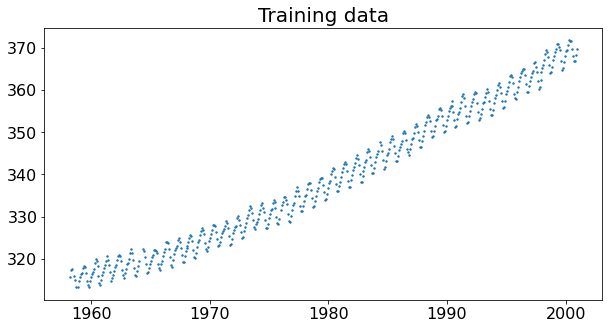

In [11]:
# Plot training data

x_train = training_data[:,0]
y_train = training_data[:,1]

plt.scatter(x_train, y_train, s=2)
plt.title('Training data')
plt.show()

In [13]:
# Fit linear model and calculate MSE

beta_lin = np.polyfit(x_train, y_train, 1)
fit_lin = lambda x: beta_lin[0]*x + beta_lin[1]
y_fit_lin = fit_lin(x_train)

MSE = np.linalg.norm(y_fit_lin - y_train)**2 / len(y_train)
print(f"MSE: {MSE:.3f}")

MSE: 7.436


In [14]:
# Fit quadratic model and calculate MSE

beta_quad = np.polyfit(x_train, y_train, 2)
fit_quad = lambda x: beta_quad[0]* (x*x) + beta_quad[1]*x + beta_quad[2]
y_fit_quad = fit_quad(x_train)

MSE = np.linalg.norm(y_fit_quad - y_train)**2 / len(y_train)
print(f"MSE: {MSE:.3f}")

MSE: 4.788


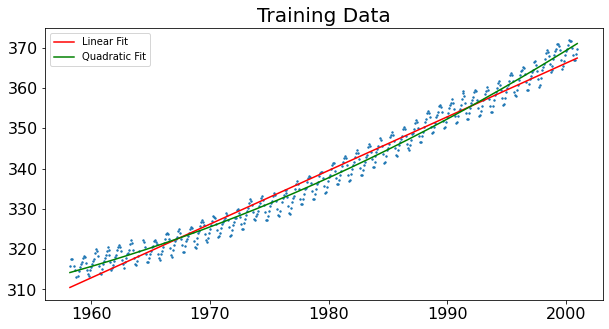

In [23]:
# Plot fits on Training data

plt.plot(x_train, y_fit_lin, 'r', label="Linear Fit")
plt.plot(x_train, y_fit_quad,'g', label="Quadratic Fit")
plt.scatter(x_train, y_train, s=2)
plt.title("Training Data")
plt.legend()
plt.show()

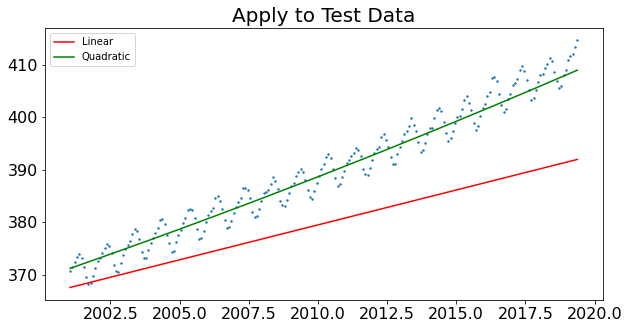

In [24]:
# Test on Test data

x_test = test_data[:,0]
y_test = test_data[:,1]

plt.plot(x_test, fit_lin(x_test), 'r', label="Linear")
plt.plot(x_test, fit_quad(x_test),'g', label="Quadratic")
plt.scatter(x_test, y_test, s=2)
plt.title("Apply to Test Data")
plt.legend()
plt.show()

It is clear that a quadratic fit is much better!